In [1]:
import pandas as pd
from skfda import FDataGrid
import numpy as np
import matplotlib.pyplot as plt 
from skfda.exploratory.visualization.clustering import plot_clusters
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
diff = pd.read_pickle(r"C:\Python\Projects\crystal-phase-prediction\pkl_files\neutron_hfo2.pkl")

In [3]:
q = pd.read_pickle(r"C:\Python\Projects\crystal-phase-prediction\pkl_files\neutron_hfo2_q.pkl")

In [4]:
diff = diff.to_numpy()
diff

array([[0.        , 0.        , 0.        , ..., 0.05151775, 0.0475572 ,
        0.04330404],
       [0.        , 0.        , 0.        , ..., 0.00379414, 0.00333948,
        0.00291064],
       [0.        , 0.        , 0.        , ..., 0.02601298, 0.02340744,
        0.02082356],
       ...,
       [0.        , 0.        , 0.        , ..., 0.02117529, 0.01925634,
        0.01734916],
       [0.        , 0.        , 0.        , ..., 0.01983364, 0.01930938,
        0.01855325],
       [0.        , 0.        , 0.        , ..., 0.00132481, 0.00118536,
        0.00104676]])

In [5]:
q = q.to_numpy()

In [6]:
#change to datagrid object
data_matrix = diff
grid_points = q
grid_points
q = np.linspace(0, 8, 16000)
q

array([0.00000000e+00, 5.00031252e-04, 1.00006250e-03, ...,
       7.99899994e+00, 7.99949997e+00, 8.00000000e+00])

In [7]:
grid = FDataGrid(data_matrix, q)

In [8]:
import matplotlib.pyplot as plt

from skfda.ml.clustering import KMeans

In [21]:
n_clusters = 5
seed = 0

In [22]:
kmeans = KMeans(n_clusters=n_clusters, random_state = seed)
kmeans.fit(grid)
pred_labels = kmeans.predict(grid)


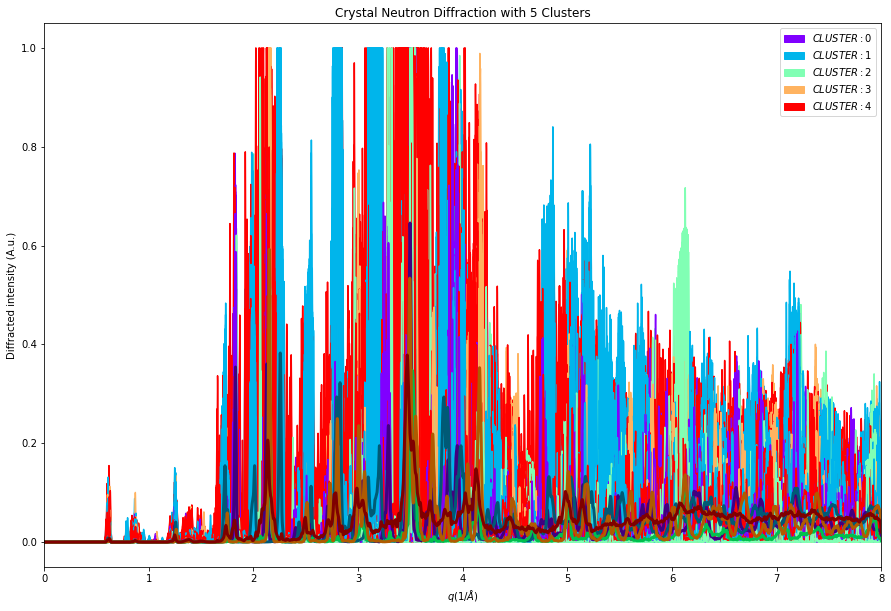

In [35]:
plot_clusters(kmeans, grid)
plt.xlim([q.min(), q.max()])
plt.xlabel('$q (1/\AA)$')
plt.ylabel('Diffracted intensity (A.u.)')
plt.title('Crystal Neutron Diffraction with 5 Clusters')
plt.show()

In [24]:
pred_labels

array([1, 0, 3, ..., 0, 4, 2])

In [25]:
link = r"C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl"
df_labels = pd.read_pickle(link)
df_labels

,ID,labels_0_3,labels_0_4
0,Ag_HfO2_cat_3.125_222_m,m,m
1,Ag_HfO2_cat_3.125_222_o,o,o
2,Ag_HfO2_cat_3.125_222_p-o,p-o,p-o
3,Ag_HfO2_cat_3.125_222_t,t,t
4,Ag_HfO2_cat_6.25_122_m,m,m
...,...,...,...
1720,Zr_HfO2_inter_6.25_212_t,t,t
1721,Zr_HfO2_inter_6.25_221_m,m,m
1722,Zr_HfO2_inter_6.25_221_o,o,o
1723,Zr_HfO2_inter_6.25_221_p-o,p-o,unknown


In [28]:
df_labels['labels_0_4'].replace({'m':1, 'p-o':3, 'o':0, 't':2, 'unknown':4}, inplace=True)
y_true = df_labels["labels_0_4"]
y_true

0       1
1       0
2       3
3       2
4       1
       ..
1720    2
1721    1
1722    0
1723    4
1724    2
Name: labels_0_4, Length: 1725, dtype: int64

In [32]:
df_labels['pred_labels'] = pred_labels

In [34]:
df_labels.head(50)

,ID,labels_0_3,labels_0_4,pred_labels
0,Ag_HfO2_cat_3.125_222_m,m,1,1
1,Ag_HfO2_cat_3.125_222_o,o,0,0
2,Ag_HfO2_cat_3.125_222_p-o,p-o,3,3
3,Ag_HfO2_cat_3.125_222_t,t,2,2
4,Ag_HfO2_cat_6.25_122_m,m,1,1
5,Ag_HfO2_cat_6.25_122_p-o,p-o,3,3
6,Ag_HfO2_cat_6.25_122_t,t,4,2
7,Ag_HfO2_cat_6.25_212_m,m,1,1
8,Ag_HfO2_cat_6.25_212_o,o,0,0
9,Ag_HfO2_cat_6.25_212_p-o,p-o,3,3


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, pred_labels)

array([[262,   0,   7,   0,  76],
       [  0, 449,   0,   0,  11],
       [  0,   0, 218,   2,  25],
       [  0,   0,   3, 249, 152],
       [  3,   2,  72,   9, 185]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, pred_labels)

0.7901449275362319